In [62]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from keras.utils import to_categorical

## Import Mnist Dataset

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

In [63]:
train_images_filepath = 'dataset/mnist_dataset/train-images.idx3-ubyte'
train_labels_filepath = 'dataset/mnist_dataset/train-labels.idx1-ubyte'
test_images_filepath = 'dataset/mnist_dataset/t10k-images.idx3-ubyte'
test_labels_filepath = 'dataset/mnist_dataset/t10k-labels.idx1-ubyte'

In [64]:
X_train, y_train = loadlocal_mnist( train_images_filepath, train_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)

In [65]:
print("The shape of of X_train: ", X_train.shape)
print("The shape of of y_train: ", y_train.shape)

The shape of of X_train:  (60000, 784)
The shape of of y_train:  (60000,)


In [66]:
print("The shape of of X_test: ", X_test.shape)
print("The shape of of y_test: ", y_test.shape)

The shape of of X_test:  (10000, 784)
The shape of of y_test:  (10000,)


## Data visualization on Minist Dataset

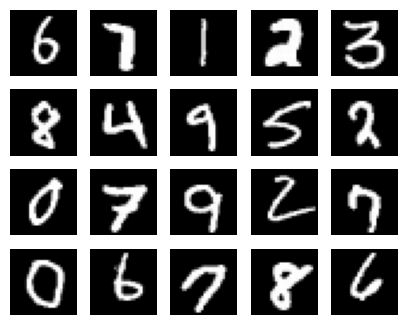

In [67]:
# sample 20 mnist digits from train dataset
x = X_train.reshape(60000, 28, 28)
indexes = np.random.randint(0, x.shape[0], size=20)
images = x[indexes]
labels = y_train[indexes]


# plot the 20 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [68]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train_vector = to_categorical(y_train)

y_test_vector = to_categorical(y_test)
print("The shape of of X_test after convert to one-hot vector: ", y_train_vector.shape)
print("The shape of of y_test after convert to one-hot vector: ", y_test_vector.shape)

The shape of of X_test after convert to one-hot vector:  (60000, 10)
The shape of of y_test after convert to one-hot vector:  (10000, 10)


## Building and Training the Classification ANN

### Importing the Keras libraries and packages

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

### Initialising the ANN

In [70]:
ann_model = Sequential()

### Add layers

In [71]:
ann_model.add(Dense(20, activation='sigmoid', input_shape=(784,)))
ann_model.add(Dropout(0.1))
ann_model.add(Dense(20, activation='sigmoid'))
ann_model.add(Dropout(0.1))
ann_model.add(Dense(10, activation='sigmoid'))
ann_model.add(Dropout(0.1))
ann_model.add(Dense(10, activation='softmax'))

### Model summary

In [72]:
ann_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,440 (64.22 KB)

 Trainable params: 16,440 (64.22 KB)

 Non-trainable params: 0 (0.00 B)

## Build and Compare Adam optimizer with other optimizers

In [73]:
def build_model(x_train, y_train, optimizer, model):
    print("Opimizer: ", optimizer)
    model.compile(loss="mse", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=100, epochs=10)
    return model, history

In [74]:
adam_ann_model, adam_ann_history = build_model(X_train, y_train_vector, Adam(), ann_model)
rmsprop_ann_model, rmsprop_ann_history = build_model(X_train, y_train_vector, RMSprop(), ann_model)
adagrad_ann_model, adagrad_ann_history = build_model(X_train, y_train_vector, 
                                                     Adagrad(learning_rate=0.01), ann_model)
sgd_ann_model, sgd_ann_history = build_model(X_train, y_train_vector, 
                                             SGD(learning_rate=0.01), ann_model)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x320481e20>
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.2162 - loss: 0.0872
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.4657 - loss: 0.0663
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5790 - loss: 0.0564
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6390 - loss: 0.0504
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.6738 - loss: 0.0461
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.6966 - loss: 0.0431
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.7157 - loss: 0.0411
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7351 - loss: 0.0388
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.7560 - loss: 0.0367
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.7685 - loss: 0.0345
Opimizer:  <keras.src.optimizers.rmsprop.RMSprop obje

### Evaluate the model on the test set

In [75]:
loss, acc = adam_ann_model.evaluate(X_test, y_test_vector, batch_size=100)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8748 - loss: 0.0196

Test accuracy: 88.8%


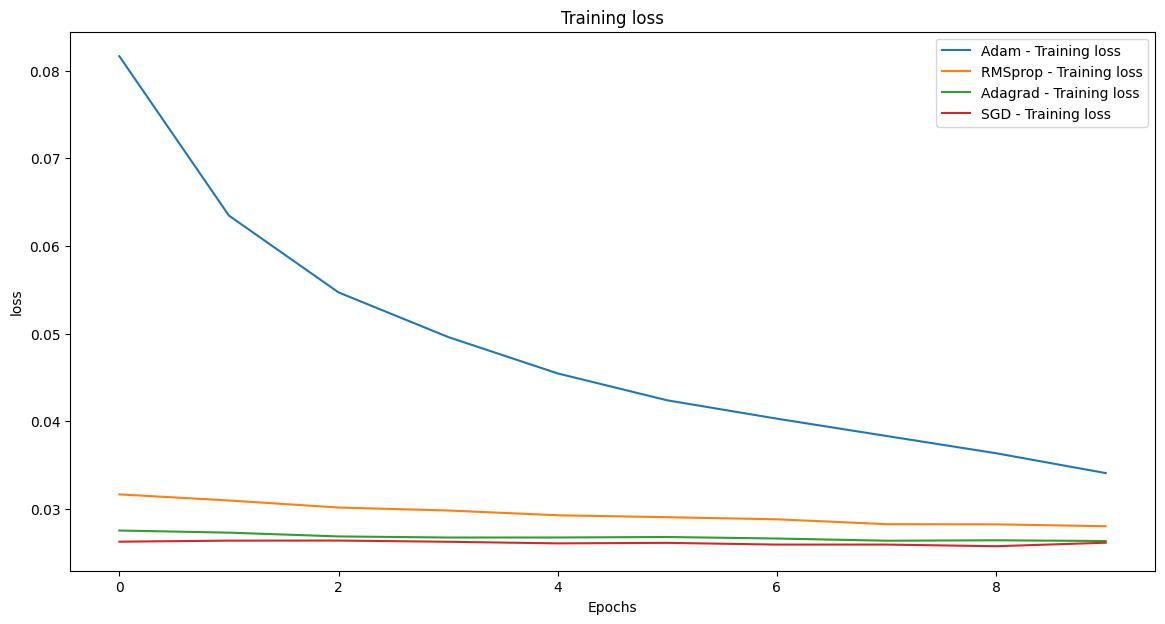

In [76]:
# Function to plot training and validation loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_ann_history, rmsprop_ann_history, adagrad_ann_history, sgd_ann_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


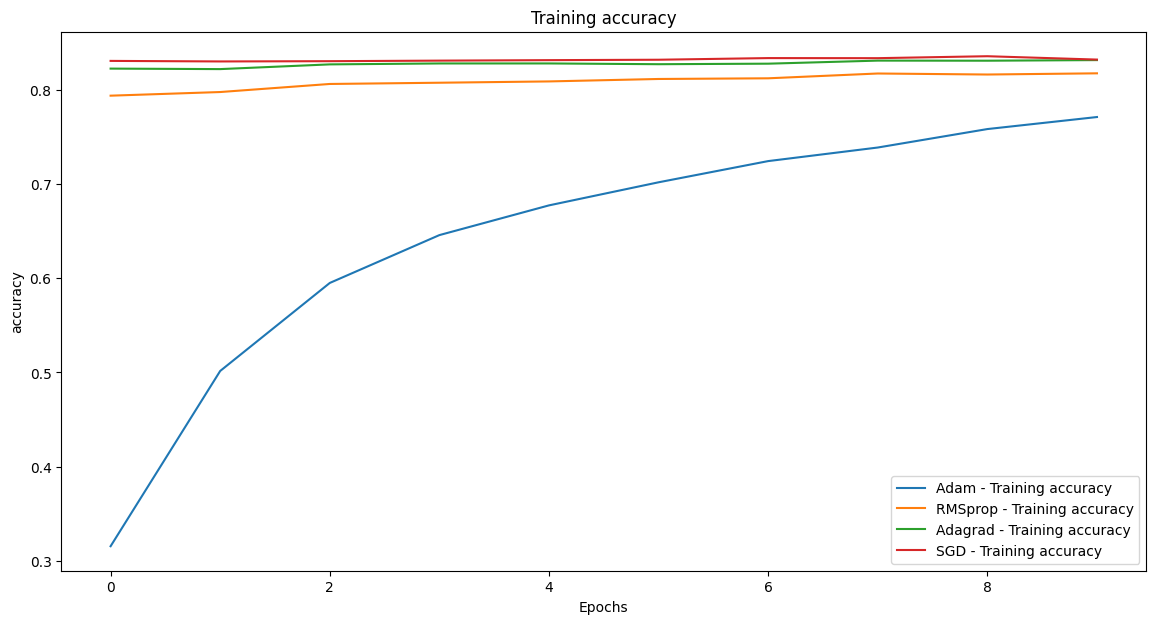

In [77]:
# Function to plot training and validation loss
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Training accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])

## Import IMDB Dataset of 50K Movie Reviews

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

In [79]:
df = pd.read_csv("dataset/IMDB_50k_movie_reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [80]:
df.shape

(50000, 2)

In [81]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [82]:
df["review"].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

### Encode the labels

In [83]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

### Splitting the dataset into training and testing

In [84]:
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_imdb)
X_train_seq = tokenizer.texts_to_sequences(X_train_imdb)
X_test_seq = tokenizer.texts_to_sequences(X_test_imdb)

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Verify the shape of data
print(X_train_pad.shape, X_test_pad.shape)

(40000, 200) (10000, 200)


### Build the ANN model

In [87]:
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train_pad.shape[1],)))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1, activation='sigmoid'))

/Users/chakryaros/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
adam_ann_model, adam_ann_history = build_model(X_train_pad, y_train_imdb, Adam(), ann_model)
rmsprop_ann_model, rmsprop_ann_history = build_model(X_train_pad, y_train_imdb, RMSprop(), ann_model)
adagrad_ann_model, adagrad_ann_history = build_model(X_train_pad, y_train_imdb, 
                                                     Adagrad(learning_rate=0.01), ann_model)
sgd_ann_model, sgd_ann_history = build_model(X_train_pad, y_train_imdb, 
                                             SGD(learning_rate=0.01), ann_model)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x320df48e0>
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5011 - loss: 0.4989
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5032 - loss: 0.4968
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5009 - loss: 0.4991
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5008 - loss: 0.4992
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4985 - loss: 0.5015
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5010 - loss: 0.4990
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5058 - loss: 0.4942
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4970 - loss: 0.5030
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5025 - loss: 0.4975
Epoch 10/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5005 - loss: 0.4995
Opimizer:  <keras.src.optimizers.rmsprop.RMSprop object at 0x320df4430>
E

### Evaluate the model on the test set

In [89]:
loss, acc = adam_ann_model.evaluate(X_test_pad, y_test_imdb, batch_size=100)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.4982 - loss: 0.5018

Test accuracy: 49.6%


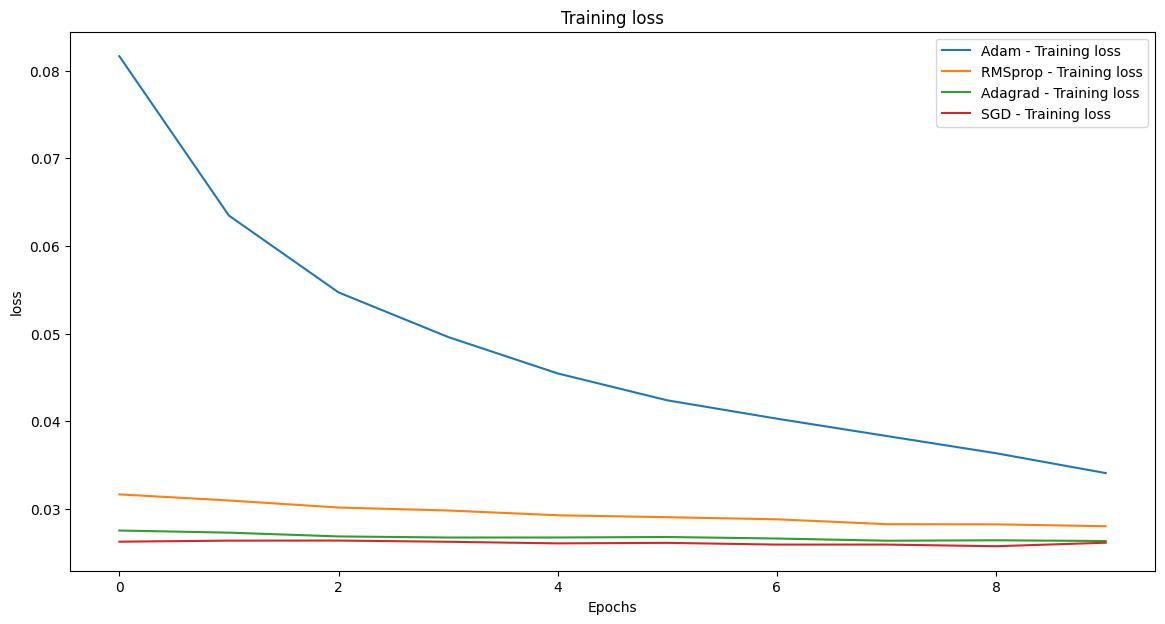

In [90]:
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])

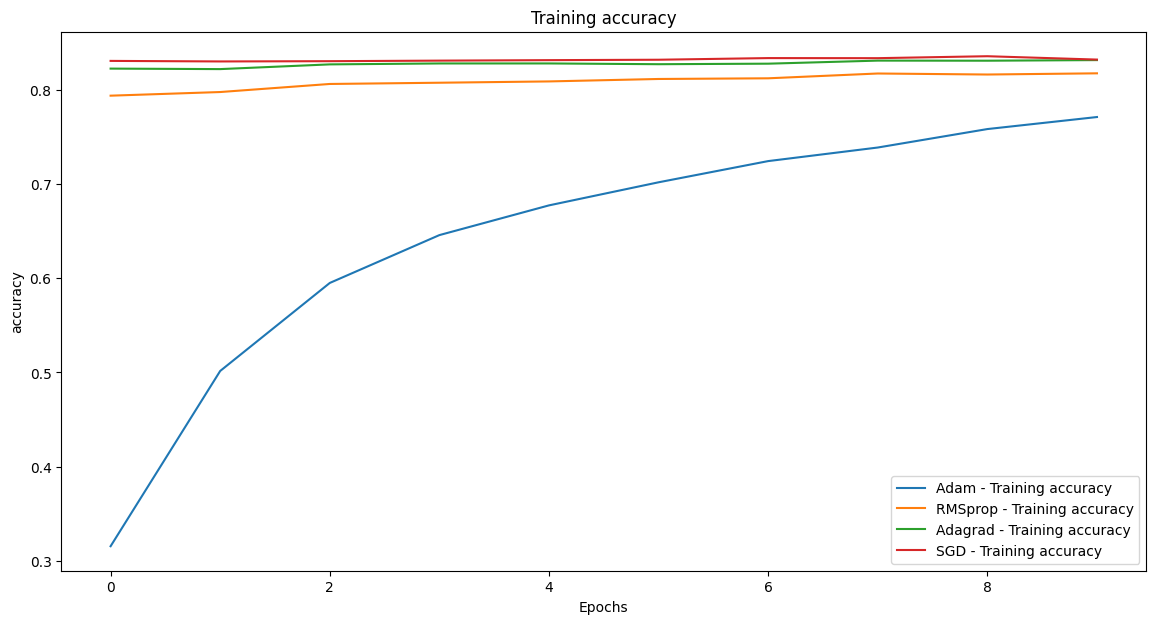

In [91]:
plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])